- <h5 style="color: aqua;">Importing libraries</h5>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

- <h5 style="color: aqua;">Loading Dataset</h5>

In [2]:
movies = pd.read_csv('Top_1000_IMDb_movies_New_version.csv')

## Step 1: Data Understanding
- Dataframe `shape`
- `info`
- `head` and `tail`
- `describe`

- <h5 style="color: aqua;">Shape of the data.</h5>

In [3]:
print(f'Dimension of dataset: {movies.shape}')
print(f'Number of rows are: {movies.shape[0]}, and number of columns are: {movies.shape[1]}')

Dimension of dataset: (1000, 9)
Number of rows are: 1000, and number of columns are: 9


- <h5 style="color: aqua;"> Info of the data</h5>

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1000 non-null   int64  
 1   Movie Name          1000 non-null   object 
 2   Year of Release     1000 non-null   object 
 3   Watch Time          1000 non-null   int64  
 4   Movie Rating        1000 non-null   float64
 5   Metascore of movie  845 non-null    float64
 6   Gross               838 non-null    object 
 7   Votes               1000 non-null   object 
 8   Description         1000 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 70.4+ KB


- <h5 style="color: aqua;">Head and tail</h5>

In [14]:
print("First 5 rows:")
movies.head(5)

First 5 rows:


,Unnamed: 0,Movie Name,Year of Release,Watch Time,Movie Rating,Metascore of movie,Gross,Votes,Description
0,0,The Shawshank Redemption,1994,142,9.3,82.0,28.34,"27,77,378","Over the course of several years, two convicts..."
1,1,The Godfather,1972,175,9.2,100.0,134.97,"19,33,588","Don Vito Corleone, head of a mafia family, dec..."
2,2,The Dark Knight,2008,152,9.0,84.0,534.86,"27,54,087",When the menace known as the Joker wreaks havo...
3,3,Schindler's List,1993,195,9.0,95.0,96.9,"13,97,886","In German-occupied Poland during World War II,..."
4,4,12 Angry Men,1957,96,9.0,97.0,4.36,"8,24,211",The jury in a New York City murder trial is fr...


In [15]:
print("Last 5 rows:")
movies.tail(5)

Last 5 rows:


,Unnamed: 0,Movie Name,Year of Release,Watch Time,Movie Rating,Metascore of movie,Gross,Votes,Description
995,995,Philomena,2013,98,7.6,77.0,37.71,"1,02,336",A world-weary political journalist picks up th...
996,996,Un long dimanche de fiançailles,2004,133,7.6,76.0,6.17,"75,004",Tells the story of a young woman's relentless ...
997,997,Shine,1996,105,7.6,87.0,35.81,"55,589","Pianist David Helfgott, driven by his father a..."
998,998,The Invisible Man,1933,71,7.6,87.0,NaN,"37,822","A scientist finds a way of becoming invisible,..."
999,999,Celda 211,2009,113,7.6,NaN,NaN,"69,464",The story of two men on different sides of a p...


- <h5 style="color: aqua;">Description of the data</h5>

In [16]:
print("Basic statistics:")
movies.describe(include='all')

Osnovne statistike:


,Unnamed: 0,Movie Name,Year of Release,Watch Time,Movie Rating,Metascore of movie,Gross,Votes,Description
count,1000.000000,1000,1000,1000.000000,1000.000000,845.000000,838,1000,1000
unique,NaN,997,123,NaN,NaN,NaN,729,997,1000
top,NaN,Drishyam 2,2014,NaN,NaN,NaN,0.01,"36,804","Over the course of several years, two convicts..."
freq,NaN,2,28,NaN,NaN,NaN,8,2,1
mean,499.500000,NaN,NaN,124.253000,7.970200,79.011834,NaN,NaN,NaN
std,288.819436,NaN,NaN,28.800355,0.275732,11.973800,NaN,NaN,NaN
min,0.000000,NaN,NaN,45.000000,7.600000,28.000000,NaN,NaN,NaN
25%,249.750000,NaN,NaN,103.000000,7.800000,71.000000,NaN,NaN,NaN
50%,499.500000,NaN,NaN,120.000000,7.900000,80.000000,NaN,NaN,NaN
75%,749.250000,NaN,NaN,139.000000,8.100000,88.000000,NaN,NaN,NaN


In [18]:
print("Columns:")
print(movies.columns.tolist())

Columns:
['Unnamed: 0', 'Movie Name', 'Year of Release', 'Watch Time', 'Movie Rating', 'Metascore of movie', 'Gross', 'Votes', 'Description']


# Step 2: Data Preperation
- Dropping irrelevant columns and rows
- Identifying duplicated columns
- Renaming Columns
- Feature Creation

In [19]:
movies.drop(['Unnamed: 0', 'Description'], axis=1, inplace=True)

movies

,Movie Name,Year of Release,Watch Time,Movie Rating,Metascore of movie,Gross,Votes
0,The Shawshank Redemption,1994,142,9.3,82.0,28.34,"27,77,378"
1,The Godfather,1972,175,9.2,100.0,134.97,"19,33,588"
2,The Dark Knight,2008,152,9.0,84.0,534.86,"27,54,087"
3,Schindler's List,1993,195,9.0,95.0,96.9,"13,97,886"
4,12 Angry Men,1957,96,9.0,97.0,4.36,"8,24,211"
...,...,...,...,...,...,...,...
995,Philomena,2013,98,7.6,77.0,37.71,"1,02,336"
996,Un long dimanche de fiançailles,2004,133,7.6,76.0,6.17,"75,004"
997,Shine,1996,105,7.6,87.0,35.81,"55,589"
998,The Invisible Man,1933,71,7.6,87.0,NaN,"37,822"


In [21]:
def normalize_title(title):
    title = str(title).strip().lower()
    title = re.sub(r'\s+', ' ', title)
    title = re.sub(r'[_\-]', ' ', title)
    title = re.sub(r'[^\w\s]', '', title)
    return title

movies['Movie Name Normalized'] = movies['Movie Name'].apply(normalize_title)

movies

,Movie Name,Year of Release,Watch Time,Movie Rating,Metascore of movie,Gross,Votes,Movie Name Normalized
0,The Shawshank Redemption,1994,142,9.3,82.0,28.34,"27,77,378",the shawshank redemption
1,The Godfather,1972,175,9.2,100.0,134.97,"19,33,588",the godfather
2,The Dark Knight,2008,152,9.0,84.0,534.86,"27,54,087",the dark knight
3,Schindler's List,1993,195,9.0,95.0,96.9,"13,97,886",schindlers list
4,12 Angry Men,1957,96,9.0,97.0,4.36,"8,24,211",12 angry men
...,...,...,...,...,...,...,...,...
995,Philomena,2013,98,7.6,77.0,37.71,"1,02,336",philomena
996,Un long dimanche de fiançailles,2004,133,7.6,76.0,6.17,"75,004",un long dimanche de fiançailles
997,Shine,1996,105,7.6,87.0,35.81,"55,589",shine
998,The Invisible Man,1933,71,7.6,87.0,NaN,"37,822",the invisible man


In [22]:
duplikati_postoje = movies['Movie Name Normalized'].duplicated().any()
print(f"Postoje li duplikati u normalizovanoj koloni 'Movie Name'? {duplikati_postoje}")

if duplikati_postoje:
    duplikatni_redovi = movies[movies['Movie Name Normalized'].duplicated(keep=False)]
    print("Duplikatni redovi (normalizovani):")
    print(duplikatni_redovi[['Movie Name', 'Year of Release', 'Movie Name Normalized']])
else:
    print("Nema duplikata u normalizovanoj koloni 'Movie Name'.")

# Uklanjanje duplikata na osnovu normalizovane kolone
#movies = movies.drop_duplicates(subset=['Movie Name Normalized'])

#movies.drop(columns=['Movie Name Normalized'], inplace=True)
movies.drop_duplicates(subset=['Movie Name Normalized', 'Year of Release'], inplace=True)

print(f"Dimenzije dataset-a nakon uklanjanja duplikata: {movies.shape}")

Postoje li duplikati u normalizovanoj koloni 'Movie Name'? True
Duplikatni redovi (normalizovani):
     Movie Name Year of Release Movie Name Normalized
90   Drishyam 2            2021            drishyam 2
102    Scarface            1983              scarface
139    Drishyam            2013              drishyam
179  Drishyam 2            2022            drishyam 2
189    Drishyam            2015              drishyam
905    Scarface            1932              scarface
Dimenzije dataset-a nakon uklanjanja duplikata: (1000, 8)


In [23]:
dup_data=movies.duplicated().any()
print(f"Are there any duplicated values in a dataset? {dup_data}")

Are there any duplicated values in a dataset? False


In [24]:
movies = movies.rename(columns={'Movie Name':'Title',
                   'Year of Release':'Released_Year',
                   'Watch Time':'Runtime',
                   'Movie Rating':'IMDB_Rating',
                   'Metascore of movie':'Metascore',
                   'Votes':'No_of_Votes'})

movies

,Title,Released_Year,Runtime,IMDB_Rating,Metascore,Gross,No_of_Votes,Movie Name Normalized
0,The Shawshank Redemption,1994,142,9.3,82.0,28.34,"27,77,378",the shawshank redemption
1,The Godfather,1972,175,9.2,100.0,134.97,"19,33,588",the godfather
2,The Dark Knight,2008,152,9.0,84.0,534.86,"27,54,087",the dark knight
3,Schindler's List,1993,195,9.0,95.0,96.9,"13,97,886",schindlers list
4,12 Angry Men,1957,96,9.0,97.0,4.36,"8,24,211",12 angry men
...,...,...,...,...,...,...,...,...
995,Philomena,2013,98,7.6,77.0,37.71,"1,02,336",philomena
996,Un long dimanche de fiançailles,2004,133,7.6,76.0,6.17,"75,004",un long dimanche de fiançailles
997,Shine,1996,105,7.6,87.0,35.81,"55,589",shine
998,The Invisible Man,1933,71,7.6,87.0,NaN,"37,822",the invisible man


In [25]:
movies.dtypes

Title                     object
Released_Year             object
Runtime                    int64
IMDB_Rating              float64
Metascore                float64
Gross                     object
No_of_Votes               object
Movie Name Normalized     object
dtype: object

In [26]:
non_numeric_years = movies[~movies['Released_Year'].str.isnumeric()]

print(non_numeric_years)

                  Title Released_Year  Runtime  IMDB_Rating  Metascore  \
59                   96       II 2018      158          8.5        NaN   
65                Joker        I 2019      122          8.4       59.0   
77                 Coco        I 2017      105          8.4       81.0   
163          The Father        I 2020       97          8.2       88.0   
232          Inside Out        I 2015       95          8.1       94.0   
240           Spotlight        I 2015      129          8.1       93.0   
244                Rush        I 2013      123          8.1       74.0   
246                Room        I 2015      118          8.1       86.0   
332                Pink      III 2016      136          8.1        NaN   
350        The Revenant        I 2015      156          8.0       76.0   
395               Mommy        I 2014      139          8.0       74.0   
444         Mar adentro        I 2004      126          8.0       74.0   
476             Arrival       II 2016 

In [27]:
non_numeric_count = movies[~movies['Released_Year'].str.isnumeric()].shape[0]

print(f"Number of non numeric values in column 'Released_Year': {non_numeric_count}")

Number of non numeric values in column 'Released_Year': 35


In [28]:
non_numeric_values = movies[~movies['Released_Year'].str.isnumeric()]['Released_Year'].unique()

print("Non numeric values in column 'Released_Year':")
print(non_numeric_values)

Non numeric values in column 'Released_Year':
['II 2018' 'I 2019' 'I 2017' 'I 2020' 'I 2015' 'I 2013' 'III 2016'
 'I 2014' 'I 2004' 'II 2016' 'I 2011' 'I 2001' 'I 2022' 'I 2008' 'I 2010'
 'I 2006' 'I 2007' 'II 2022' 'I 1995' 'I 1985' 'III 2018']


In [ ]:
def extract_year(year_str):
    match = re.search(r'\d{4}', year_str)
    if match:
        return int(match.group())
    return None

movies['Released_Year'] = movies['Released_Year'].apply(extract_year)

movies


In [31]:
nan_released_year = movies['Released_Year'].isna().sum()
print(f"Broj NaN vrednosti u koloni 'Released_Year' nakon konverzije: {nan_released_year}")


Broj NaN vrednosti u koloni 'Released_Year' nakon konverzije: 0


In [32]:
print(movies['Released_Year'].unique())

movies['decade'] = (np.floor(movies['Released_Year']/10) * 10).astype(int)

[1994 1972 2008 1993 1957 2003 1974 2023 2010 1999 2001 1966 2002 2021
 2022 2014 1990 1975 1980 2020 1995 1998 1991 1977 1997 1954 1946 1962
 2006 1985 2019 2000 1979 1988 2011 1960 1942 1968 1931 1936 2018 2012
 1981 1986 1984 1964 2016 2017 2009 1950 1940 1963 1992 1971 1983 2004
 1987 1958 1941 1952 1927 1959 1973 1961 1944 2007 1948 1921 2013 2005
 1989 1976 1982 1939 1965 1953 2015 1969 1955 1928 1924 1996 1978 1967
 1949 1934 1930 1926 1951 1925 1937 1920 1947 1945 1956 1922 1933 1970
 1938 1932 1943 1935]


In [33]:
print(movies.loc[[59, 65, 77]])

    Title  Released_Year  Runtime  IMDB_Rating  Metascore   Gross No_of_Votes  \
59     96           2018      158          8.5        NaN     NaN      33,646   
65  Joker           2019      122          8.4       59.0  335.45   13,81,002   
77   Coco           2017      105          8.4       81.0  209.73    5,46,380   

   Movie Name Normalized  decade  
59                    96    2010  
65                 joker    2010  
77                  coco    2010  


In [34]:
movies.dtypes

Title                     object
Released_Year              int64
Runtime                    int64
IMDB_Rating              float64
Metascore                float64
Gross                     object
No_of_Votes               object
Movie Name Normalized     object
decade                     int32
dtype: object

In [35]:
print(movies['Gross'].unique())

['28.34' '134.97' '534.86' '96.9' '4.36' '377.85' '57.3' '15' '107.93'
 '292.58' '37.03' '315.54' '330.25' '6.1' '342.55' '219' nan '29' '188.02'
 '46.84' '112' '171.48' '290.48' '100.13' '216.54' '130.74' '204.84'
 '136.8' '322.74' '7.56' '10.06' '57.6' '0.27' '21' '47' '53.09' '210.61'
 '53.37' '187.71' '132.38' '78.9' '13.09' '19.5' '32.57' '23.34' '422.78'
 '6.72' '46' '13.18' '32' '1.02' '5.32' '36.76' '11.99' '0.02' '0.16'
 '25.54' '448.14' '190.24' '248.16' '162.81' '335.45' '858.37' '44.02'
 '85.16' '0.71' '678.82' '83.47' '51.97' '91' '0.28' '11.29' '5.02'
 '209.73' '223.81' '1.66' '6.53' '11.49' '62' '61' '8.18' '0.29' '87'
 '718.73' '75.6' '120.54' '67.44' '130.1' '3.64' '138.43' '56.95' '113'
 '2.83' '6.21' '45.6' '34.4' '0.69' '46.36' '191.8' '110' '293' '6.86'
 '44.82' '415' '33.23' '309.13' '2.38' '3.2' '1.59' '8.82' '1.24' '13.28'
 '7.1' '159.6' '18.6' '136' '12.39' '0.03' '0.06' '5.72' '1.22' '0.33'
 '6.6' '5.45' '0.9' '116.9' '206.85' '804.75' '74.28' '197.17' '128.01

In [36]:
movies['Gross'] = movies['Gross'].str.replace(',', '')
movies['Gross'] = pd.to_numeric(movies['Gross'], errors='coerce')

In [37]:
print(movies['Gross'].unique())

[2.8340e+01 1.3497e+02 5.3486e+02 9.6900e+01 4.3600e+00 3.7785e+02
 5.7300e+01 1.5000e+01 1.0793e+02 2.9258e+02 3.7030e+01 3.1554e+02
 3.3025e+02 6.1000e+00 3.4255e+02 2.1900e+02        nan 2.9000e+01
 1.8802e+02 4.6840e+01 1.1200e+02 1.7148e+02 2.9048e+02 1.0013e+02
 2.1654e+02 1.3074e+02 2.0484e+02 1.3680e+02 3.2274e+02 7.5600e+00
 1.0060e+01 5.7600e+01 2.7000e-01 2.1000e+01 4.7000e+01 5.3090e+01
 2.1061e+02 5.3370e+01 1.8771e+02 1.3238e+02 7.8900e+01 1.3090e+01
 1.9500e+01 3.2570e+01 2.3340e+01 4.2278e+02 6.7200e+00 4.6000e+01
 1.3180e+01 3.2000e+01 1.0200e+00 5.3200e+00 3.6760e+01 1.1990e+01
 2.0000e-02 1.6000e-01 2.5540e+01 4.4814e+02 1.9024e+02 2.4816e+02
 1.6281e+02 3.3545e+02 8.5837e+02 4.4020e+01 8.5160e+01 7.1000e-01
 6.7882e+02 8.3470e+01 5.1970e+01 9.1000e+01 2.8000e-01 1.1290e+01
 5.0200e+00 2.0973e+02 2.2381e+02 1.6600e+00 6.5300e+00 1.1490e+01
 6.2000e+01 6.1000e+01 8.1800e+00 2.9000e-01 8.7000e+01 7.1873e+02
 7.5600e+01 1.2054e+02 6.7440e+01 1.3010e+02 3.6400e+00 1.3843

In [38]:
num_nan_gross = movies['Gross'].isna().sum()
print(f"Broj NaN vrednosti u koloni 'Gross' nakon konverzije: {num_nan_gross}")

Broj NaN vrednosti u koloni 'Gross' nakon konverzije: 163


In [39]:
movies.dtypes

Title                     object
Released_Year              int64
Runtime                    int64
IMDB_Rating              float64
Metascore                float64
Gross                    float64
No_of_Votes               object
Movie Name Normalized     object
decade                     int32
dtype: object

In [40]:
movies['No_of_Votes'] = movies['No_of_Votes'].str.replace(',', '').astype(int)

In [41]:
movies.dtypes

Title                     object
Released_Year              int64
Runtime                    int64
IMDB_Rating              float64
Metascore                float64
Gross                    float64
No_of_Votes                int32
Movie Name Normalized     object
decade                     int32
dtype: object

In [42]:
missing_values = movies.isna().sum().reset_index()
missing_values.columns = ['columns','missing_counts']
missing_values

,columns,missing_counts
0,Title,0
1,Released_Year,0
2,Runtime,0
3,IMDB_Rating,0
4,Metascore,155
5,Gross,163
6,No_of_Votes,0
7,Movie Name Normalized,0
8,decade,0


In [43]:
missvals = movies.isna().sum()
misspct = (missvals / len(movies)) * 100
print('Missing Values (% of entries):')
print(round(misspct.sort_values(ascending=False), 2))

Missing Values (% of entries):
Gross                    16.3
Metascore                15.5
Title                     0.0
Released_Year             0.0
Runtime                   0.0
IMDB_Rating               0.0
No_of_Votes               0.0
Movie Name Normalized     0.0
decade                    0.0
dtype: float64


In [44]:
num_nan_metascore = movies['Metascore'].isna().sum()
num_nan_gross = movies['Gross'].isna().sum()

print(f"Number of NaN values in column 'Metascore' is: {num_nan_metascore}")
print(f"Number of NaN values in column 'Gross' is: {num_nan_gross}")

Number of NaN values in column 'Metascore' is: 155
Number of NaN values in column 'Gross' is: 163


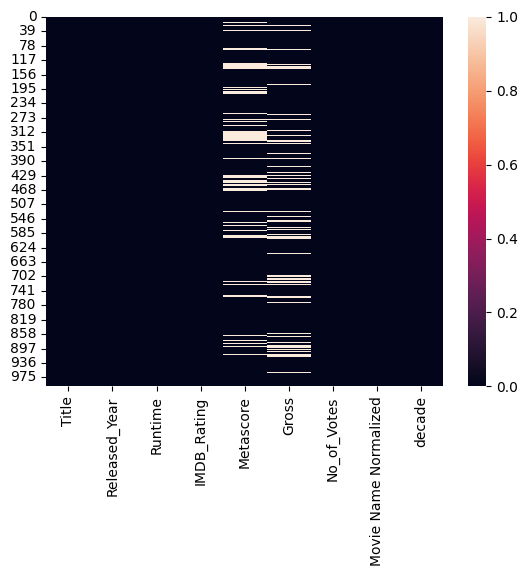

In [45]:
sns.heatmap(movies.isnull())
plt.show()

# It is clear that we have 2 columns which have missing values:
- Metascore
- Gross

In [48]:
columns_of_interest = ['Metascore', 'Gross']

description = movies[columns_of_interest].describe()
print(description)

        Metascore       Gross
count  845.000000  837.000000
mean    79.011834   72.838017
std     11.973800  115.021621
min     28.000000    0.000000
25%     71.000000    3.330000
50%     80.000000   25.440000
75%     88.000000   96.900000
max    100.000000  936.660000


In [49]:
movies['Metascore'].value_counts()

Metascore
86.0     36
76.0     30
81.0     29
85.0     28
84.0     28
83.0     28
72.0     27
78.0     26
90.0     26
82.0     25
88.0     24
74.0     24
87.0     24
73.0     23
79.0     23
77.0     23
75.0     22
94.0     21
71.0     21
80.0     20
92.0     19
68.0     18
89.0     18
96.0     17
69.0     17
91.0     17
97.0     16
70.0     16
66.0     16
65.0     15
93.0     15
95.0     15
67.0     15
100.0    14
64.0     12
98.0     11
63.0     10
61.0      8
62.0      8
58.0      8
47.0      5
60.0      5
59.0      5
55.0      5
99.0      4
57.0      3
54.0      3
53.0      3
51.0      3
52.0      3
49.0      2
50.0      2
56.0      2
33.0      1
48.0      1
44.0      1
45.0      1
46.0      1
30.0      1
28.0      1
Name: count, dtype: int64

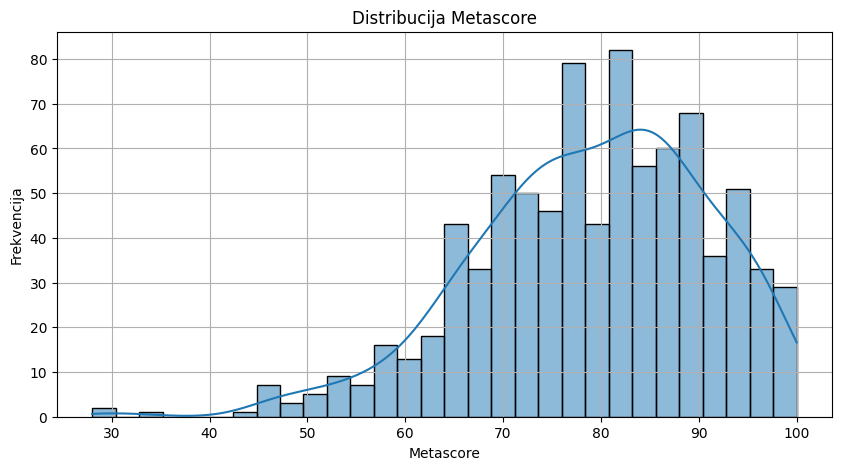

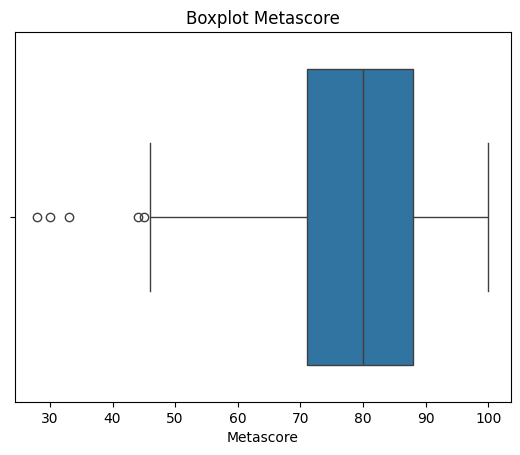

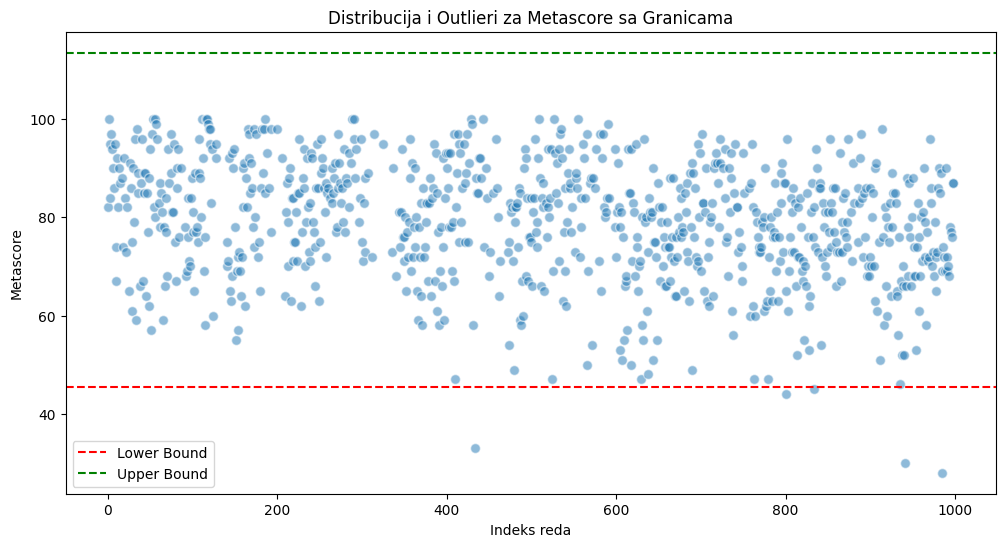

In [50]:
plt.figure(figsize=(10, 5))
sns.histplot(movies['Metascore'].dropna(), bins=30, kde=True)
plt.title('Distribucija Metascore')
plt.xlabel('Metascore')
plt.ylabel('Frekvencija')
plt.grid(True)
plt.show()

sns.boxplot(x=movies['Metascore'])
plt.title('Boxplot Metascore')
plt.xlabel('Metascore')
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(movies.index, movies['Metascore'], alpha=0.5, edgecolors='w', s=50)
plt.axhline(movies['Metascore'].quantile(0.25) - 1.5 * (movies['Metascore'].quantile(0.75) - movies['Metascore'].quantile(0.25)), color='r', linestyle='--', label='Lower Bound')
plt.axhline(movies['Metascore'].quantile(0.75) + 1.5 * (movies['Metascore'].quantile(0.75) - movies['Metascore'].quantile(0.25)), color='g', linestyle='--', label='Upper Bound')
plt.title('Distribucija i Outlieri za Metascore sa Granicama')
plt.xlabel('Indeks reda')
plt.ylabel('Metascore')
plt.legend()


In [51]:
average_metascore = movies['Metascore'].mean()

average_metascore

79.01183431952663

In [52]:
movies['Metascore'] = movies['Metascore'].fillna(average_metascore)

print(movies['Metascore'].head(10))

0     82.0
1    100.0
2     84.0
3     95.0
4     97.0
5     94.0
6     90.0
7     86.0
8     95.0
9     74.0
Name: Metascore, dtype: float64


In [53]:
has_nan_metascore = movies['Metascore'].isnull().any()

print(f"Do column 'Metascore' containes NaN values? {has_nan_metascore}")

Do column 'Metascore' containes NaN values? False


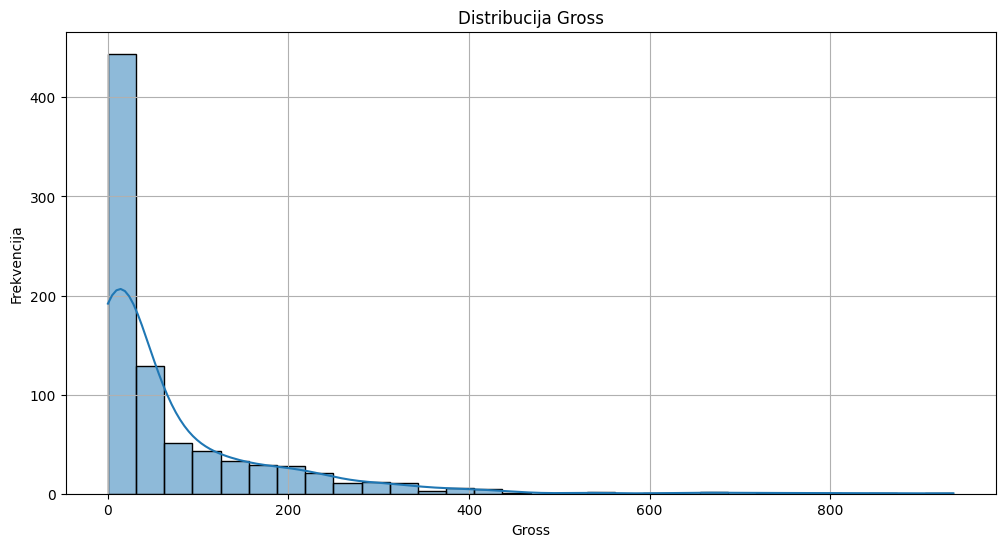

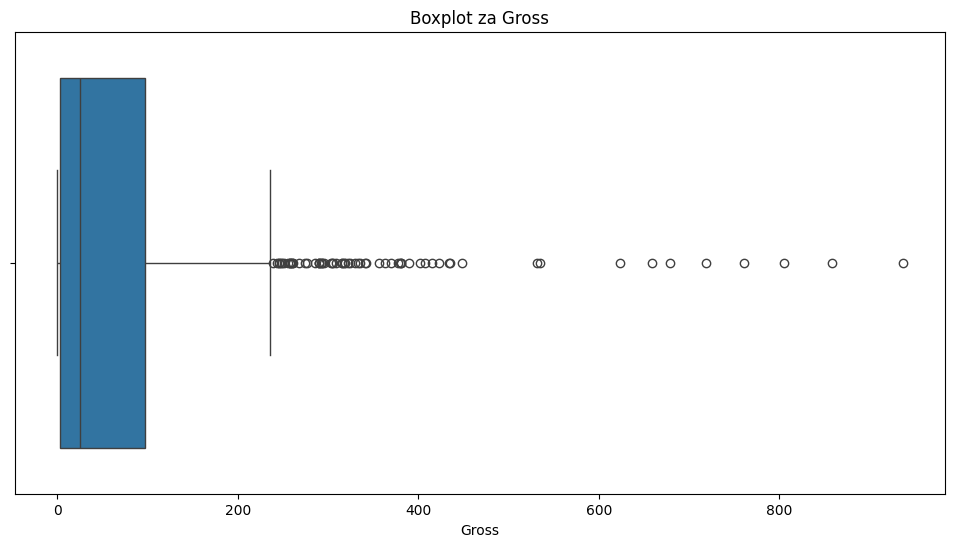

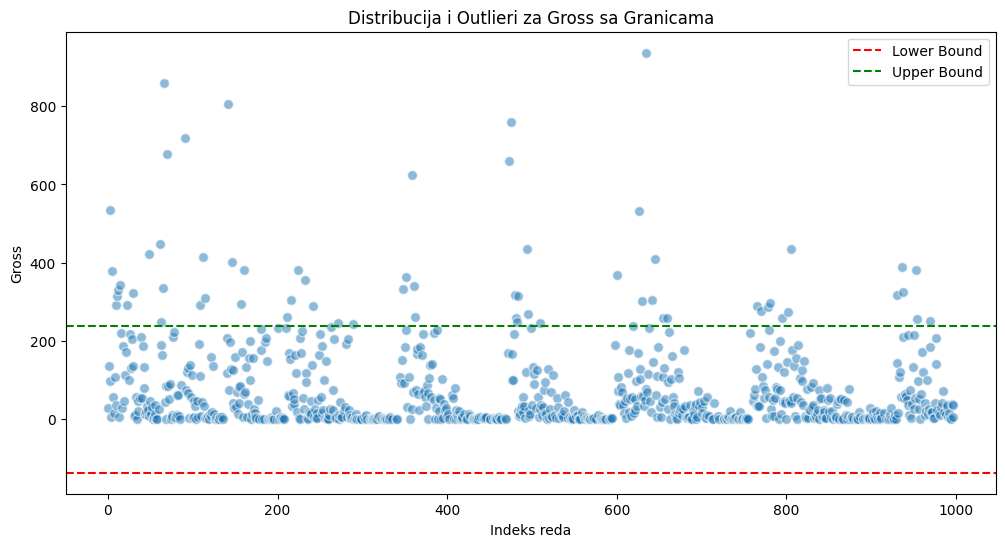

In [54]:
plt.figure(figsize=(12, 6))
sns.histplot(movies['Gross'].dropna(), bins=30, kde=True)
plt.title('Distribucija Gross')
plt.xlabel('Gross')
plt.ylabel('Frekvencija')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=movies['Gross'])
plt.title('Boxplot za Gross')
plt.xlabel('Gross')
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(movies.index, movies['Gross'], alpha=0.5, edgecolors='w', s=50)
plt.axhline(movies['Gross'].quantile(0.25) - 1.5 * (movies['Gross'].quantile(0.75) - movies['Gross'].quantile(0.25)), color='r', linestyle='--', label='Lower Bound')
plt.axhline(movies['Gross'].quantile(0.75) + 1.5 * (movies['Gross'].quantile(0.75) - movies['Gross'].quantile(0.25)), color='g', linestyle='--', label='Upper Bound')
plt.title('Distribucija i Outlieri za Gross sa Granicama')
plt.xlabel('Indeks reda')
plt.ylabel('Gross')
plt.legend()
plt.show()

In [55]:
median_gross = movies['Gross'].median()

median_gross

25.44

In [56]:
movies['Gross'] = movies['Gross'].fillna(median_gross)

print(movies['Gross'].head(10))

0     28.34
1    134.97
2    534.86
3     96.90
4      4.36
5    377.85
6     57.30
7     15.00
8    107.93
9    292.58
Name: Gross, dtype: float64


In [57]:
num_nan_gross = movies['Gross'].isna().sum()

print(f"Number of NaN values in column 'Gross' is: {num_nan_gross}")

Number of NaN values in column 'Gross' is: 0


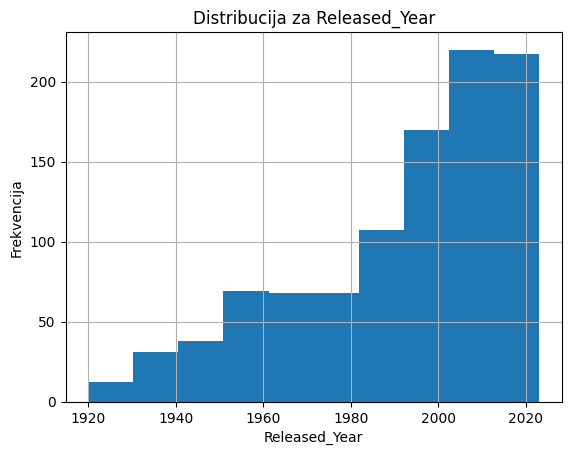

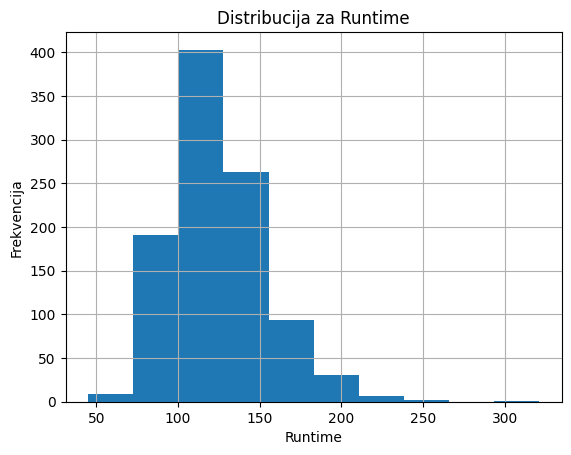

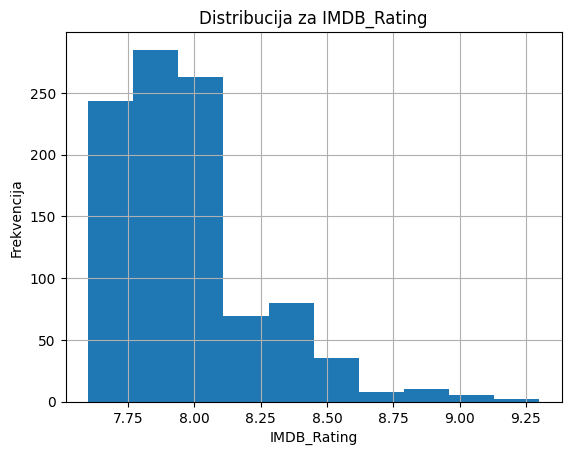

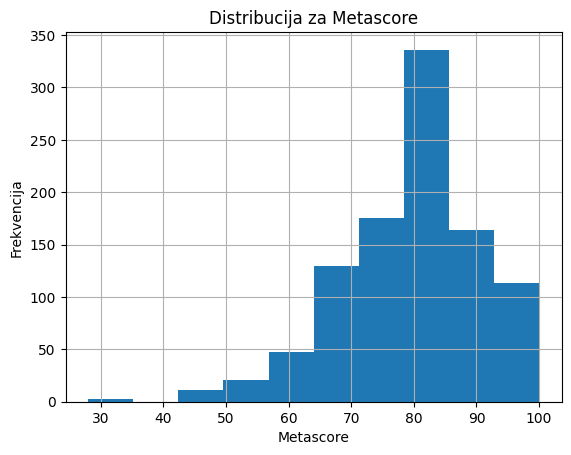

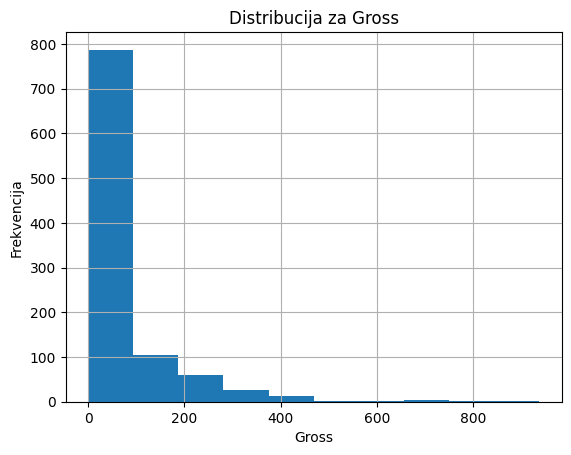

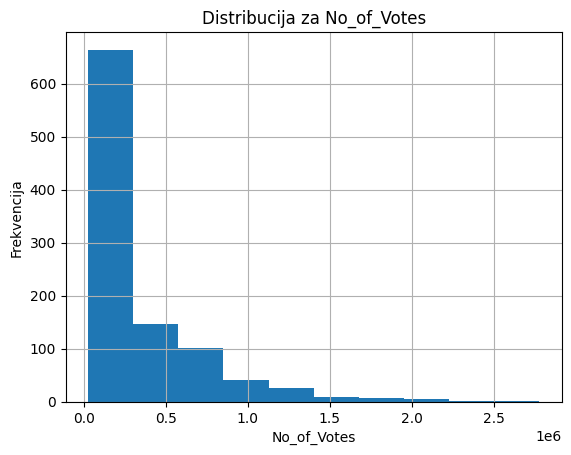

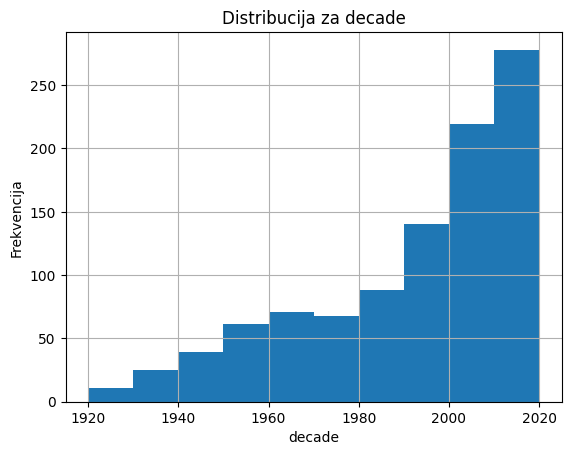

In [58]:
for column in movies.select_dtypes(include=['number']).columns:
    movies[column].hist()
    plt.title(f'Distribucija za {column}')
    plt.xlabel(column)
    plt.ylabel('Frekvencija')
    plt.show()

In [59]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  1000 non-null   object 
 1   Released_Year          1000 non-null   int64  
 2   Runtime                1000 non-null   int64  
 3   IMDB_Rating            1000 non-null   float64
 4   Metascore              1000 non-null   float64
 5   Gross                  1000 non-null   float64
 6   No_of_Votes            1000 non-null   int32  
 7   Movie Name Normalized  1000 non-null   object 
 8   decade                 1000 non-null   int32  
dtypes: float64(3), int32(2), int64(2), object(2)
memory usage: 62.6+ KB


In [60]:
print(movies.isna().sum())

Title                    0
Released_Year            0
Runtime                  0
IMDB_Rating              0
Metascore                0
Gross                    0
No_of_Votes              0
Movie Name Normalized    0
decade                   0
dtype: int64


In [61]:
movies.describe()

,Released_Year,Runtime,IMDB_Rating,Metascore,Gross,No_of_Votes,decade
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,1991.666000,124.253000,7.970200,79.011834,65.112140,3.190469e+05,1987.150000
std,24.188045,28.800355,0.275732,11.005772,106.668355,3.871814e+05,24.206682
min,1920.000000,45.000000,7.600000,28.000000,0.000000,2.581300e+04,1920.000000
25%,1975.000000,103.000000,7.800000,73.000000,5.010000,6.238100e+04,1970.000000
50%,1999.000000,120.000000,7.900000,79.011834,25.440000,1.581340e+05,1990.000000
75%,2011.000000,139.000000,8.100000,86.000000,70.677500,4.436372e+05,2010.000000
max,2023.000000,321.000000,9.300000,100.000000,936.660000,2.777378e+06,2020.000000


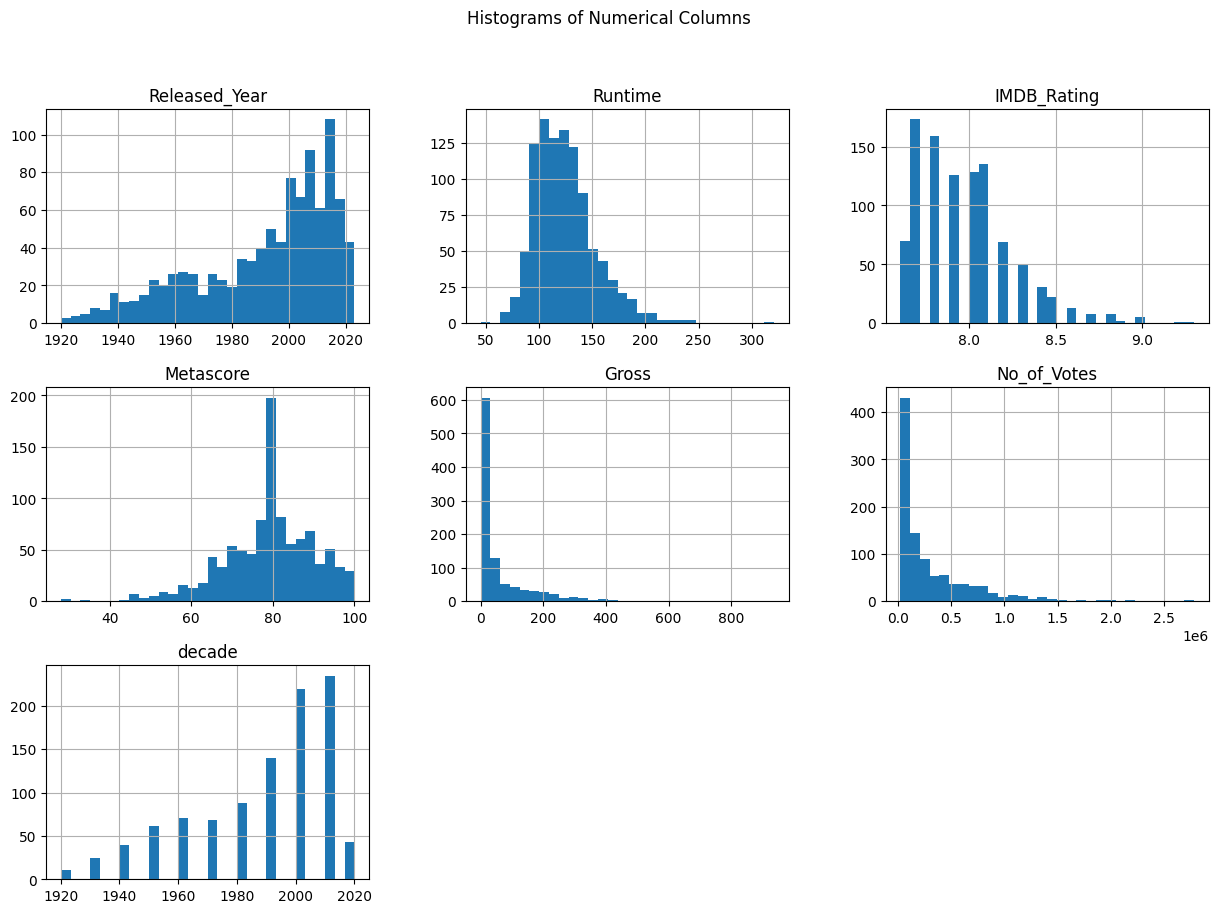

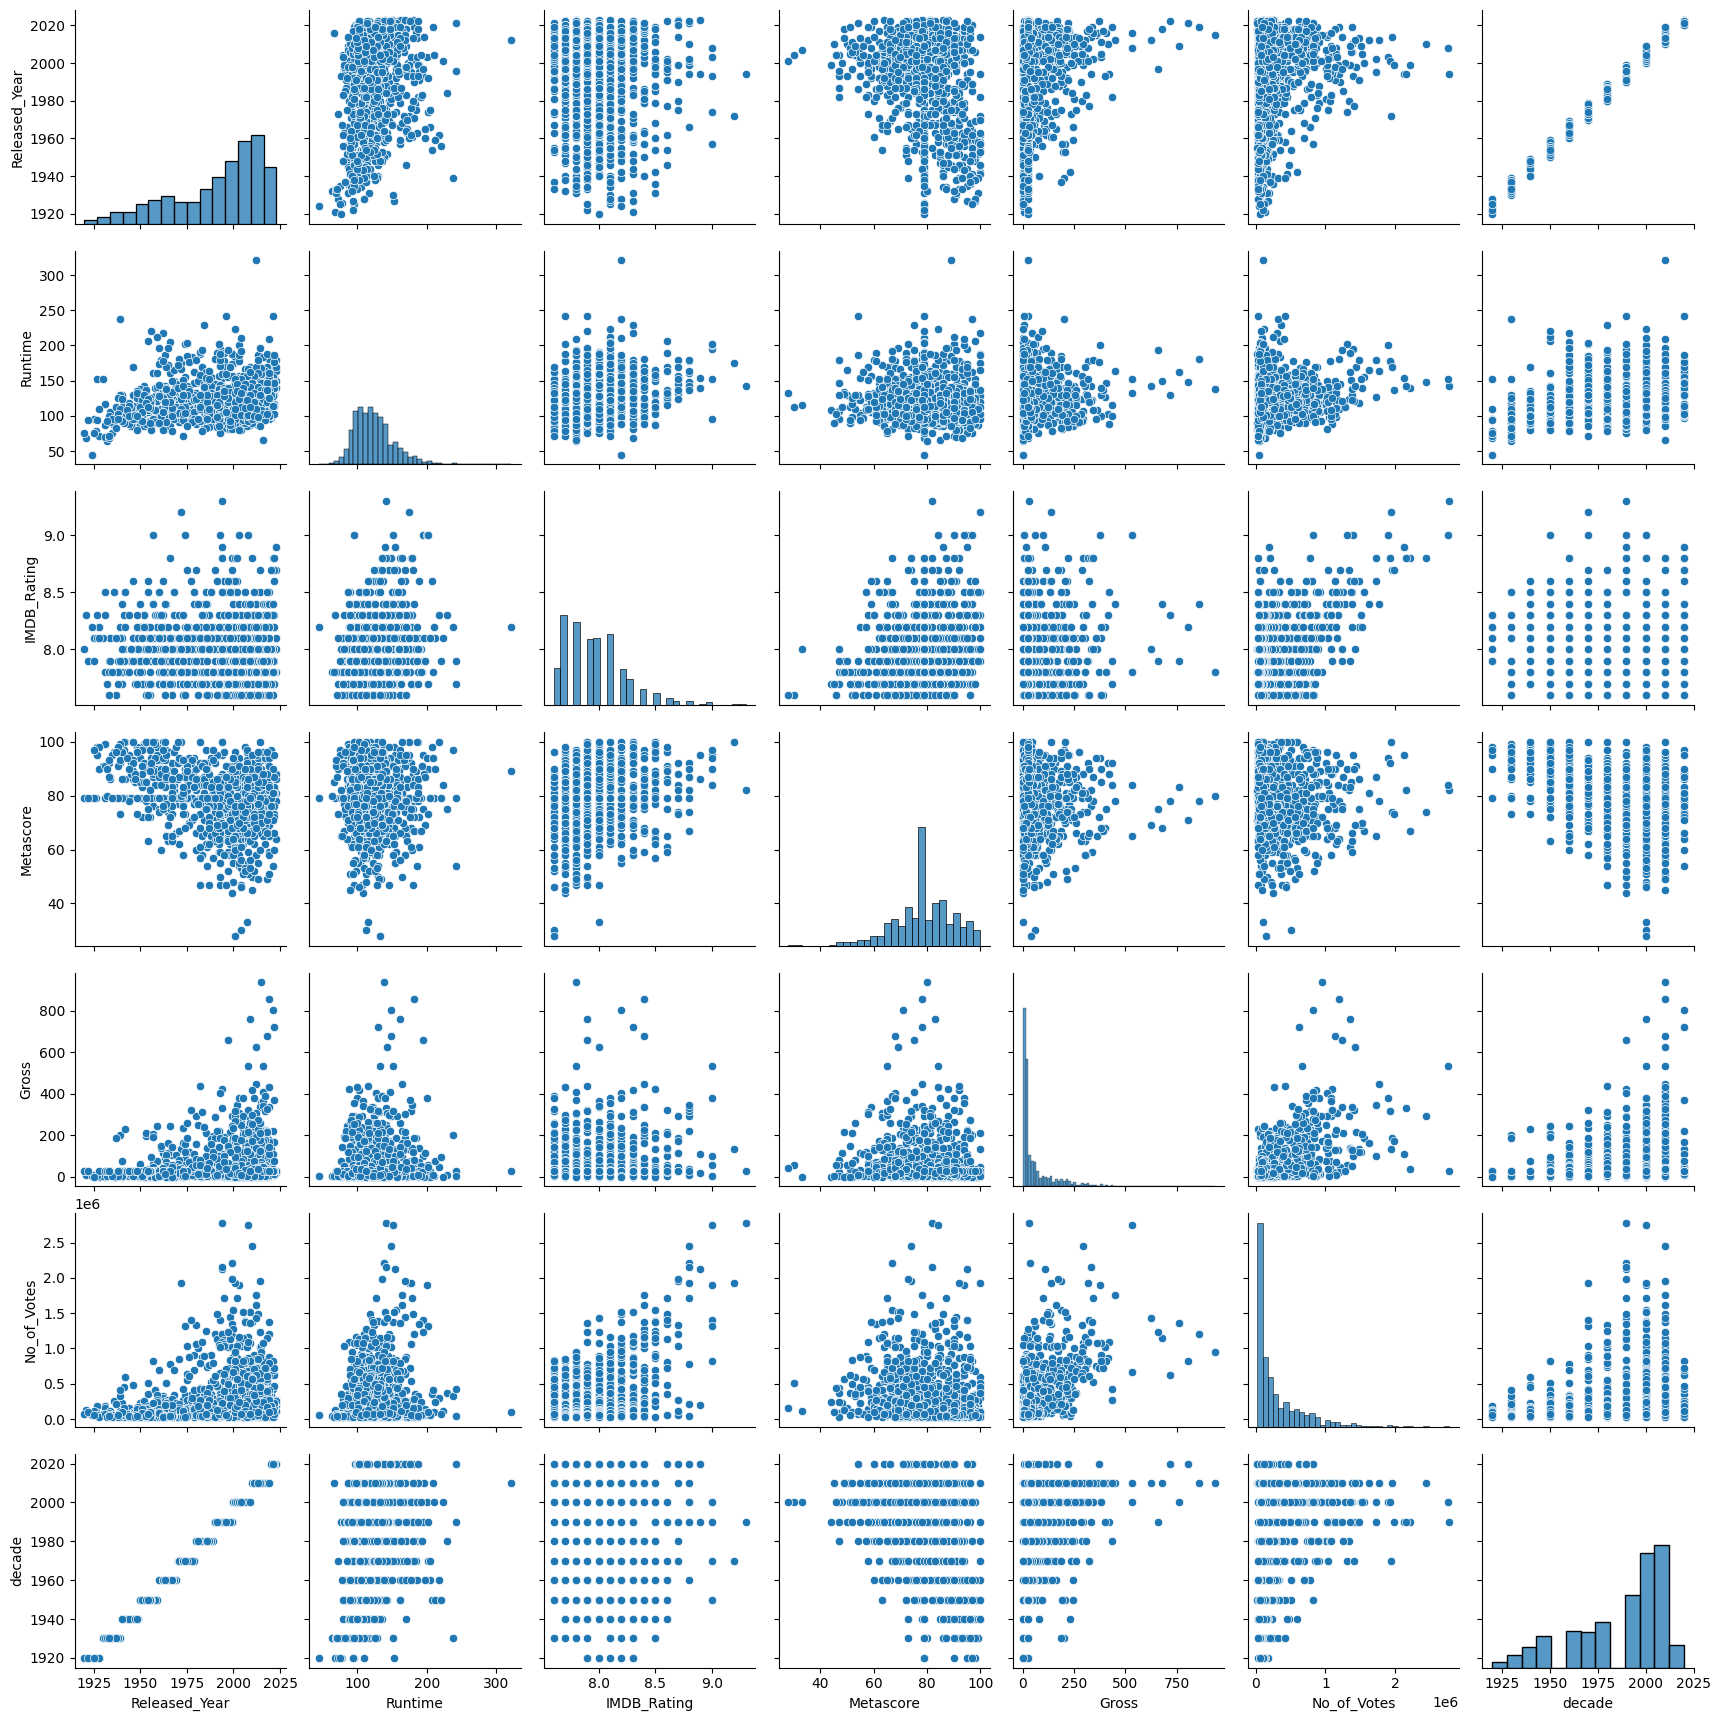

In [62]:
movies.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Columns')
plt.show()

sns.pairplot(movies)

# Step 3: Feature Understanding
(Univariate analysis)

- Plotting Feature Distributions
    - Histogram
    - KDE
    - Boxplot

In [64]:
movies['IMDB_Rating'].value_counts()

IMDB_Rating
7.7    173
7.8    159
8.1    135
8.0    128
7.9    126
7.6     70
8.2     69
8.3     49
8.4     31
8.5     22
8.6     13
8.7      8
8.8      8
9.0      5
8.9      2
9.2      1
9.3      1
Name: count, dtype: int64

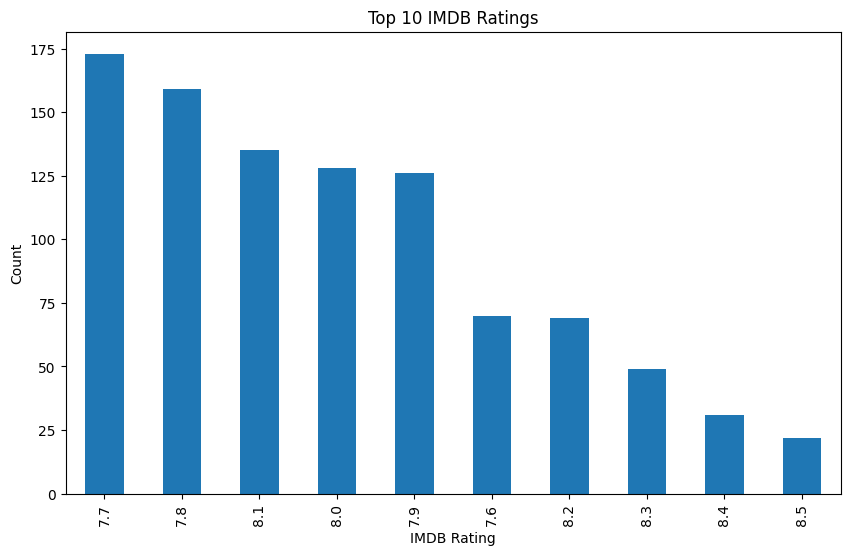

In [65]:
ax = movies['IMDB_Rating'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top 10 IMDB Ratings', figsize=(10, 6))
ax.set_xlabel('IMDB Rating')
ax.set_ylabel('Count')
plt.show()


In [66]:
average_rating_imdb = movies['IMDB_Rating'].mean()
average_rating_meta = movies['Metascore'].mean()

most_common = movies['Released_Year'].value_counts().idxmax()

box_office_distribution = movies['Gross'].describe()

print(f"Average IMDb Rating: {average_rating_imdb:.2f}")
print(f"Average Meta Score Rating: {average_rating_meta:.2f}")
print(f"Most Common Released_Year: {most_common}")
print("\nDistribution of Box Office Earnings:")
print(box_office_distribution)

Average IMDb Rating: 7.97
Average Meta Score Rating: 79.01
Most Common Released_Year: 2004

Distribution of Box Office Earnings:
count    1000.000000
mean       65.112140
std       106.668355
min         0.000000
25%         5.010000
50%        25.440000
75%        70.677500
max       936.660000
Name: Gross, dtype: float64


In [67]:
hidden_gems = movies[movies["No_of_Votes"] < 100000]
hidden_gems = hidden_gems.sort_values("IMDB_Rating", ascending=False).head(10)
print("Potential Hidden Gems:")
print(hidden_gems[["Title", "IMDB_Rating", "No_of_Votes"]])

Potential Hidden Gems:
                         Title  IMDB_Rating  No_of_Votes
16                 777 Charlie          8.8        35870
23  Rocketry: The Nambi Effect          8.7        54505
36                     Seppuku          8.6        62597
37                  Sita Ramam          8.6        61758
59                          96          8.5        33646
73                Idi i smotri          8.4        88282
79                  Capharnaüm          8.4        97339
86           Tengoku to jigoku          8.4        48880
87                      Kaithi          8.4        36952
88                Sardar Udham          8.4        44711


In [68]:
hidden_gems = movies[movies["No_of_Votes"] < 100000]
hidden_gems = hidden_gems.sort_values("Metascore", ascending=False).head(10)
print("Potential Hidden Gems:")
print(hidden_gems[["Title", "Metascore", "No_of_Votes"]])

Potential Hidden Gems:
                          Title  Metascore  No_of_Votes
555              Il conformista      100.0        32373
443      Sweet Smell of Success      100.0        34241
428               Il gattopardo      100.0        27615
288         Fanny och Alexander      100.0        65764
186            Tôkyô monogatari      100.0        64996
590             La règle du jeu       99.0        30374
535              The Wild Bunch       98.0        87997
199  La passion de Jeanne d'Arc       98.0        57981
914           The Lady Vanishes       98.0        55167
314   Du rififi chez les hommes       97.0        35854


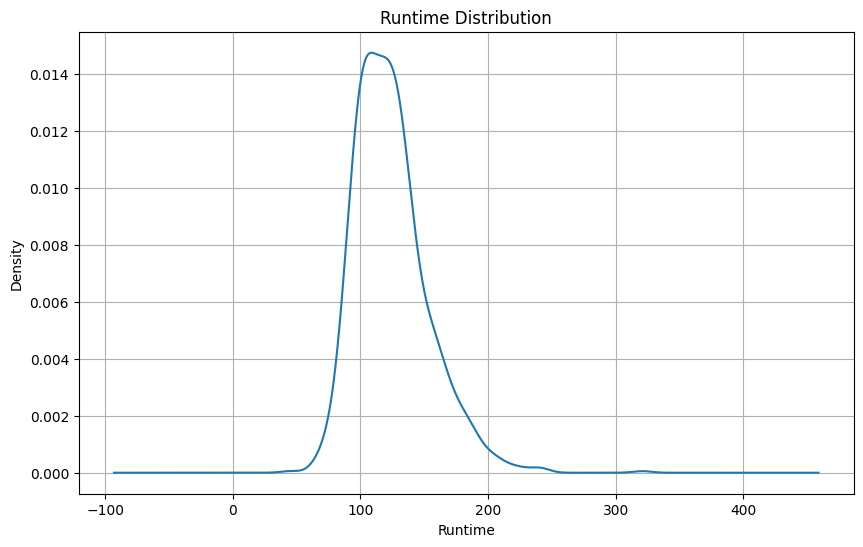

In [71]:
plt.figure(figsize=(10, 6))
ax = movies['Runtime'].plot(kind='kde', title='Runtime Distribution')
ax.set_xlabel('Runtime')
plt.grid(True)
plt.show()


In [74]:
long_movies = movies[movies['Runtime'] >= 180]

print("Title of the movie with a runtime longer or equal then 180 minutes:")
print(long_movies['Title'])

Title of the movie with a runtime longer or equal then 180 minutes:
3                                   Schindler's List
5      The Lord of the Rings: The Return of the King
6                              The Godfather Part II
17                                       Oppenheimer
29                                    The Green Mile
34                              Shichinin no samurai
66                                 Avengers: Endgame
106                      Once Upon a Time in America
111                               Lawrence of Arabia
140                          The Wolf of Wall Street
167                               Gone with the Wind
183                               Gangs of Wasseypur
196                           Swades: We, the People
207                               Bhaag Milkha Bhaag
248                                  The Deer Hunter
252                                     Barry Lyndon
265                                          Ben-Hur
288                            

In [75]:
total_long_movies = long_movies.shape[0]
print(f" Total number of movies with runtime >=180: {total_long_movies}")

 Total number of movies with runtime >=180: 48


In [76]:
top_10=movies.nlargest(10,'IMDB_Rating')[['Title','IMDB_Rating']].set_index('Title')

top_10

,IMDB_Rating
Title,
The Shawshank Redemption,9.3
The Godfather,9.2
The Dark Knight,9.0
Schindler's List,9.0
12 Angry Men,9.0
The Lord of the Rings: The Return of the King,9.0
The Godfather Part II,9.0
Spider-Man: Across the Spider-Verse,8.9
Pulp Fiction,8.9


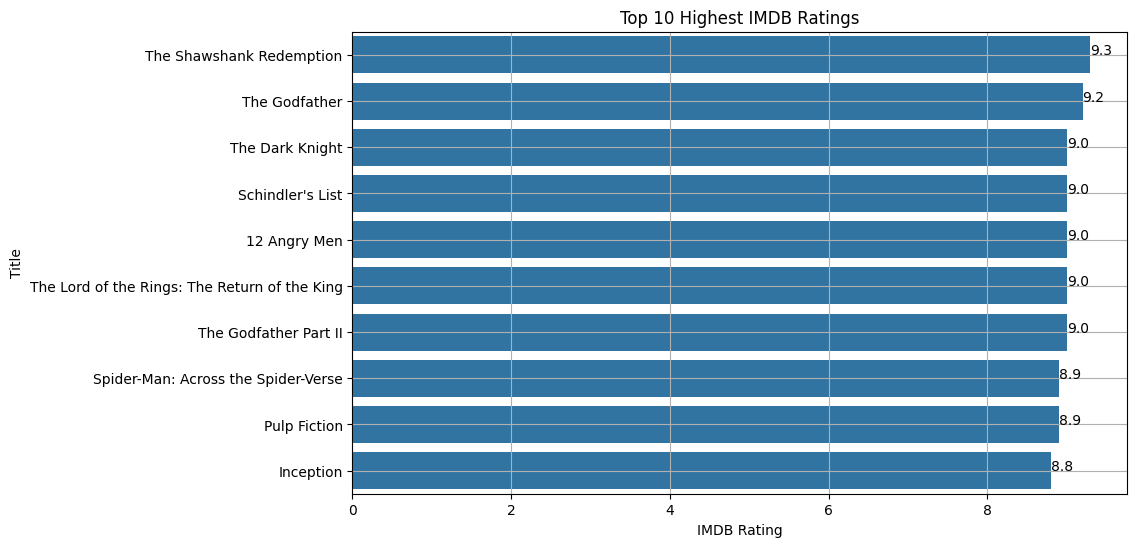

In [77]:
plt.figure(figsize=(10, 6))
sns.barplot(y=top_10.index, x='IMDB_Rating', data=top_10)
plt.title("Top 10 Highest IMDB Ratings")
plt.xlabel("IMDB Rating")
plt.ylabel("Title")
plt.grid(True)
for index, value in enumerate(top_10['IMDB_Rating']):
    plt.text(value, index, f'{value:.1f}')
plt.show()


In [79]:
movies.sort_values(by='Gross',ascending=False).head(10)

,Title,Released_Year,Runtime,IMDB_Rating,Metascore,Gross,No_of_Votes,Movie Name Normalized,decade
635,Star Wars: Episode VII - The Force Awakens,2015,138,7.8,80.0,936.66,952718,star wars episode vii the force awakens,2010
66,Avengers: Endgame,2019,181,8.4,78.0,858.37,1200821,avengers endgame,2010
142,Spider-Man: No Way Home,2021,148,8.2,71.0,804.75,818919,spider man no way home,2020
475,Avatar,2009,162,7.9,83.0,760.51,1355689,avatar,2000
91,Top Gun: Maverick,2022,130,8.3,78.0,718.73,616792,top gun maverick,2020
70,Avengers: Infinity War,2018,149,8.4,68.0,678.82,1142664,avengers infinity war,2010
473,Titanic,1997,194,7.9,75.0,659.33,1238632,titanic,1990
358,The Avengers,2012,143,8.0,69.0,623.28,1426050,the avengers,2010
2,The Dark Knight,2008,152,9.0,84.0,534.86,2754087,the dark knight,2000
626,Rogue One,2016,133,7.8,65.0,532.18,662973,rogue one,2010


In [80]:
topg_10 = movies.nlargest(10,'Gross')[['Title','Gross']].set_index('Title')

topg_10

,Gross
Title,
Star Wars: Episode VII - The Force Awakens,936.66
Avengers: Endgame,858.37
Spider-Man: No Way Home,804.75
Avatar,760.51
Top Gun: Maverick,718.73
Avengers: Infinity War,678.82
Titanic,659.33
The Avengers,623.28
The Dark Knight,534.86


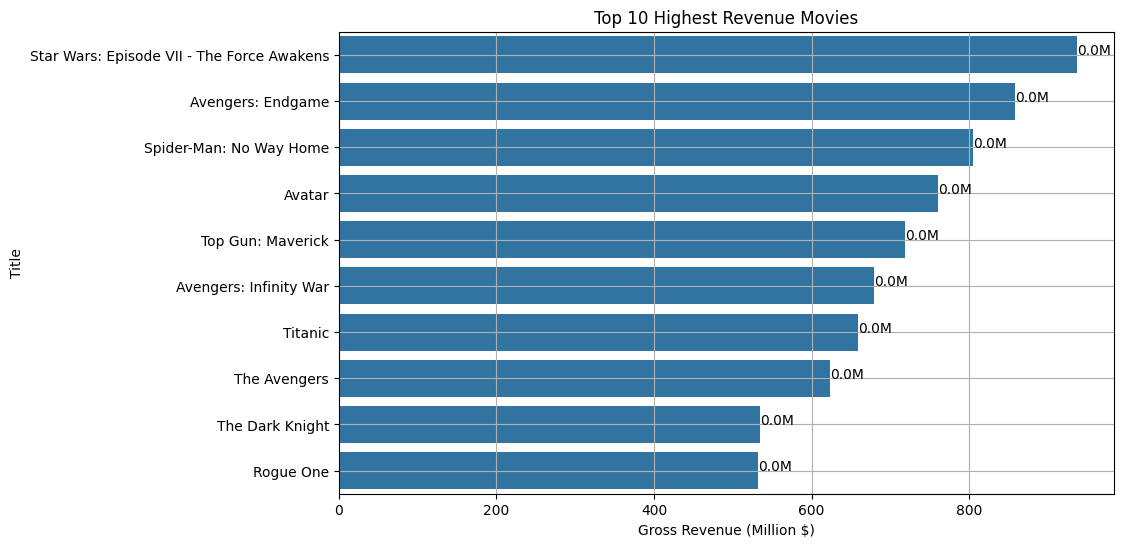

In [81]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Gross', y=topg_10.index, data=topg_10)
plt.title("Top 10 Highest Revenue Movies")
plt.xlabel("Gross Revenue (Million $)")
plt.ylabel("Title")
plt.grid(True)
for index, value in enumerate(topg_10['Gross']):
    plt.text(value, index, f'{value/1e6:.1f}M')
plt.show()

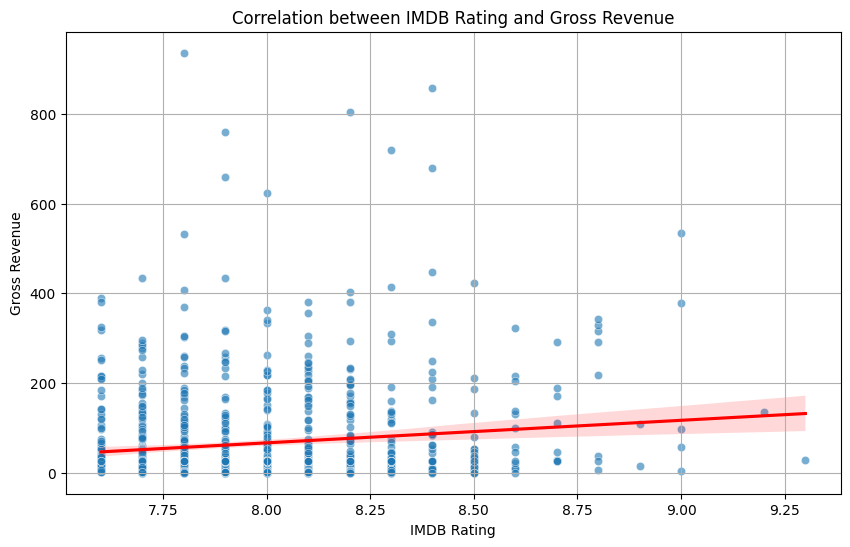

In [82]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='IMDB_Rating', y='Gross', data=movies, alpha=0.6)
sns.regplot(x='IMDB_Rating', y='Gross', data=movies, scatter=False, color='r')
plt.title("Correlation between IMDB Rating and Gross Revenue")
plt.xlabel("IMDB Rating")
plt.ylabel("Gross Revenue")
plt.grid(True)
plt.show()


# Step 4: Feature Relationships
- Scatterplot
- Heatmap Correlation
- Pairplot
- Groupby comparisons

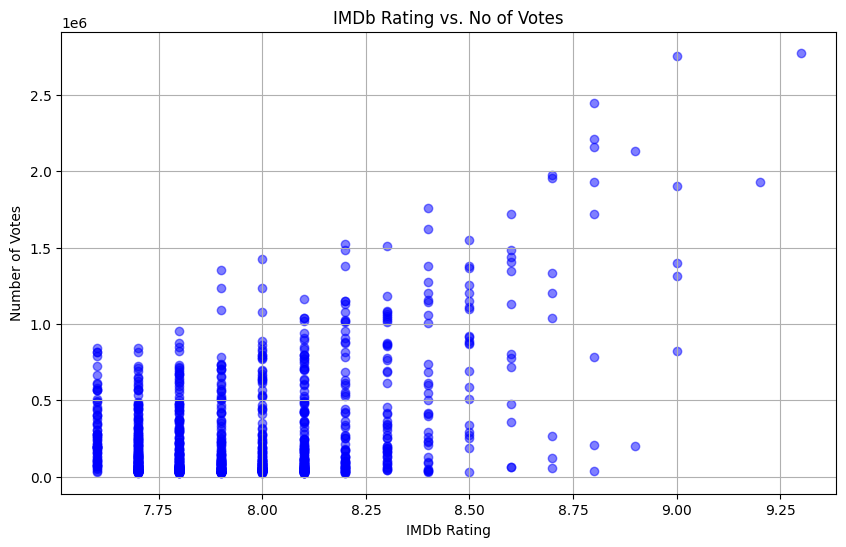

In [84]:
plt.figure(figsize=(10, 6))
plt.scatter(movies['IMDB_Rating'], movies['No_of_Votes'], alpha=0.5, color='b')
plt.title('IMDb Rating vs. No of Votes')
plt.xlabel('IMDb Rating')
plt.ylabel('Number of Votes')
plt.grid(True)
plt.show()

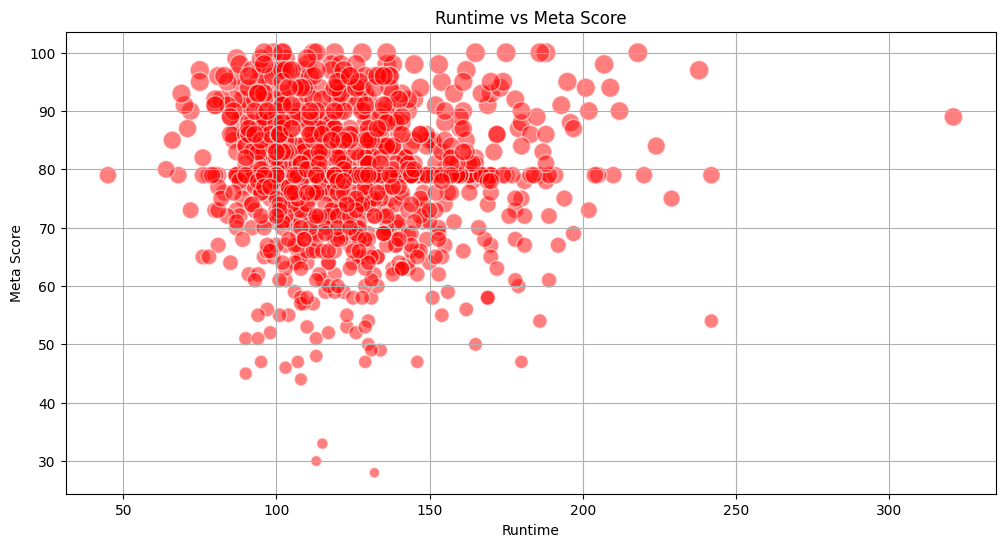

In [85]:
plt.figure(figsize=(12, 6))
plt.scatter(movies['Runtime'], movies['Metascore'], color='red', s=movies['Metascore'] * 2, alpha=0.5, edgecolors='w')
plt.title('Runtime vs Meta Score')
plt.xlabel('Runtime')
plt.ylabel('Meta Score')
plt.grid(True)
plt.show()

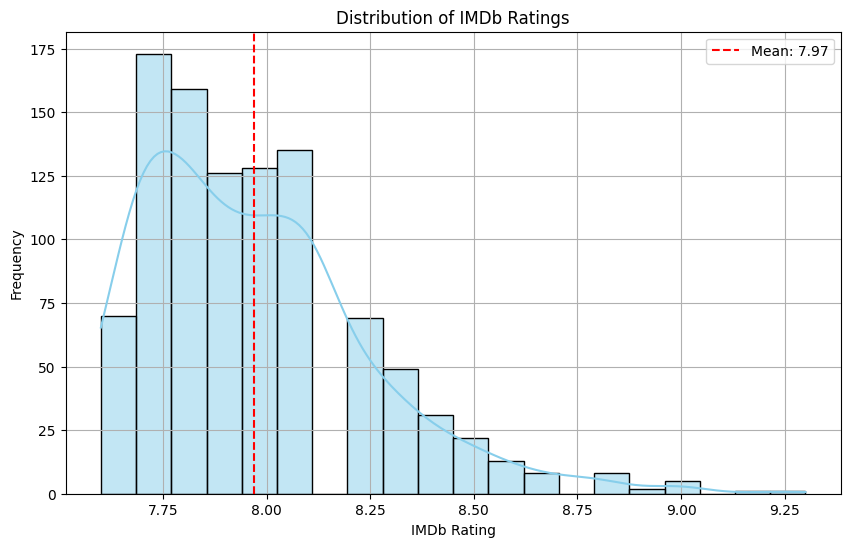

In [86]:
plt.figure(figsize=(10, 6))
sns.histplot(movies['IMDB_Rating'], bins=20, kde=True, color='skyblue')
plt.axvline(movies['IMDB_Rating'].mean(), color='r', linestyle='--', label=f'Mean: {movies["IMDB_Rating"].mean():.2f}')
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [87]:
movies_corr = movies[['Released_Year','Runtime','IMDB_Rating','Metascore', 'Gross', 'No_of_Votes']].dropna().corr()
movies_corr

,Released_Year,Runtime,IMDB_Rating,Metascore,Gross,No_of_Votes
Released_Year,1.000000,0.208913,-0.070580,-0.321408,0.203028,0.238391
Runtime,0.208913,1.000000,0.272353,-0.034591,0.113236,0.154984
IMDB_Rating,-0.070580,0.272353,1.000000,0.241215,0.130000,0.483813
Metascore,-0.321408,-0.034591,0.241215,1.000000,-0.074492,-0.063338
Gross,0.203028,0.113236,0.130000,-0.074492,1.000000,0.572090
No_of_Votes,0.238391,0.154984,0.483813,-0.063338,0.572090,1.000000


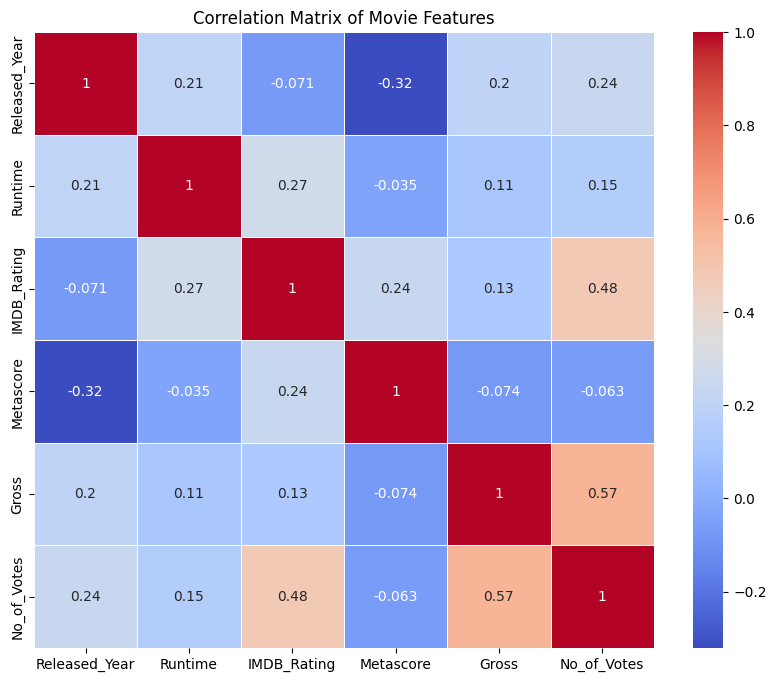

In [88]:
plt.figure(figsize=(10, 8))
sns.heatmap(movies_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Movie Features')
plt.show()


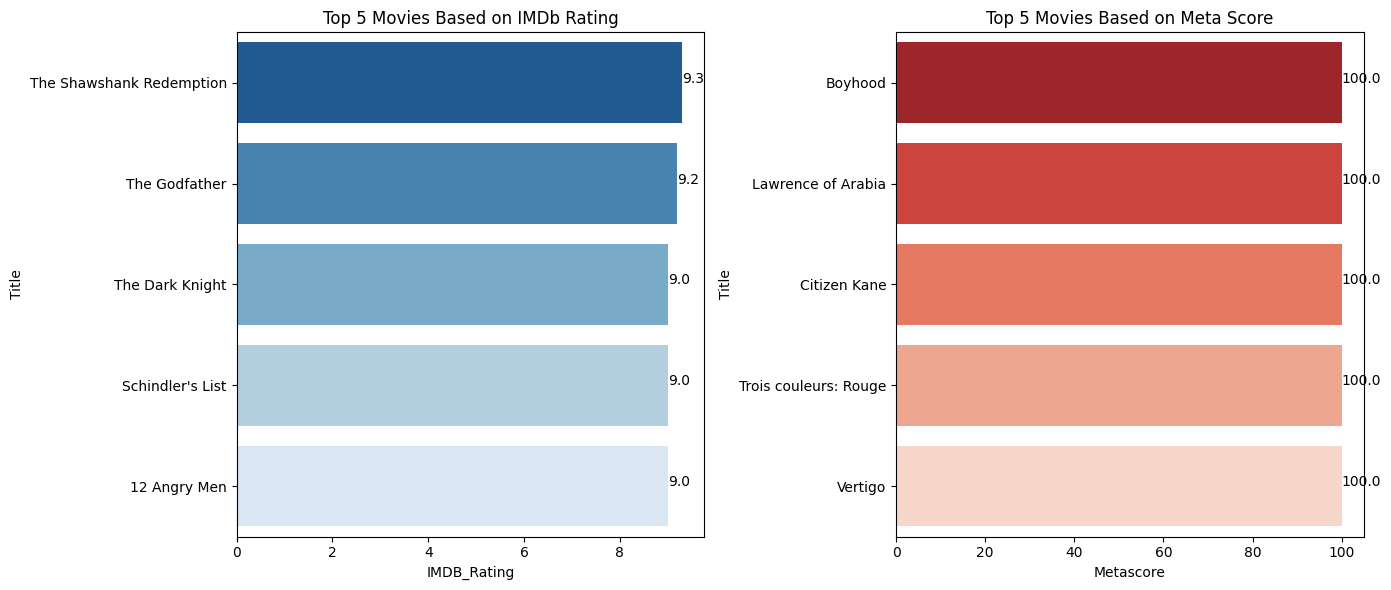

In [91]:
top_movies_imdb = movies.sort_values(by='IMDB_Rating', ascending=False).head(5)

top_movies_meta = movies.sort_values(by='Metascore', ascending=False).head(5)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='IMDB_Rating', y='Title', data=top_movies_imdb, palette='Blues_r')
plt.title('Top 5 Movies Based on IMDb Rating')
for index, value in enumerate(top_movies_imdb['IMDB_Rating']):
    plt.text(value, index, f'{value:.1f}')

plt.subplot(1, 2, 2)
sns.barplot(x='Metascore', y='Title', data=top_movies_meta, palette='Reds_r')
plt.title('Top 5 Movies Based on Meta Score')
for index, value in enumerate(top_movies_meta['Metascore']):
    plt.text(value, index, f'{value:.1f}')

plt.tight_layout()
plt.show()

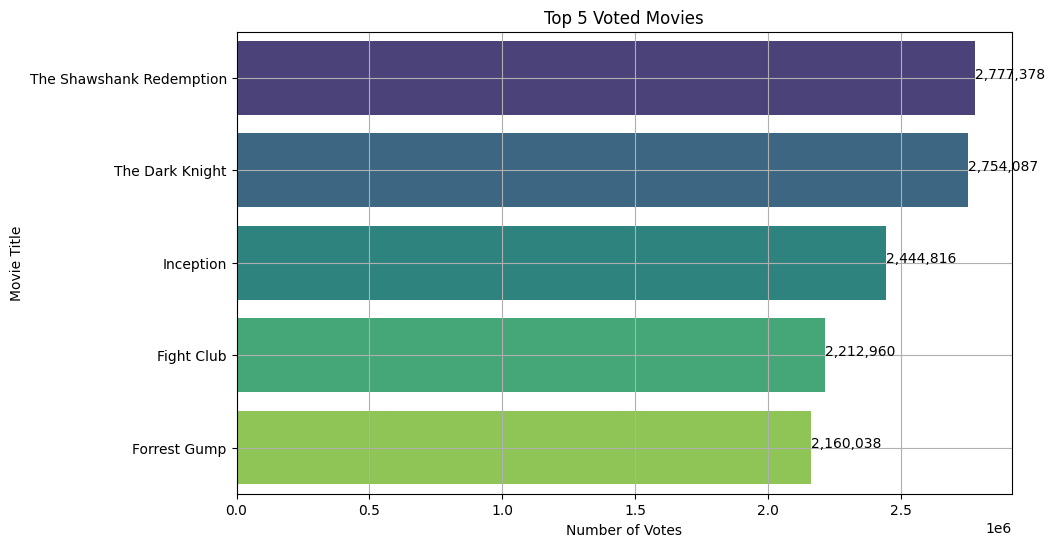

In [92]:
top_voted_movies = movies.sort_values(by='No_of_Votes', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='No_of_Votes', y='Title', data=top_voted_movies, palette='viridis')
plt.title('Top 5 Voted Movies')
plt.xlabel('Number of Votes')
plt.ylabel('Movie Title')
plt.grid(True)
for index, value in enumerate(top_voted_movies['No_of_Votes']):
    plt.text(value, index, f'{value:,}')
plt.show()

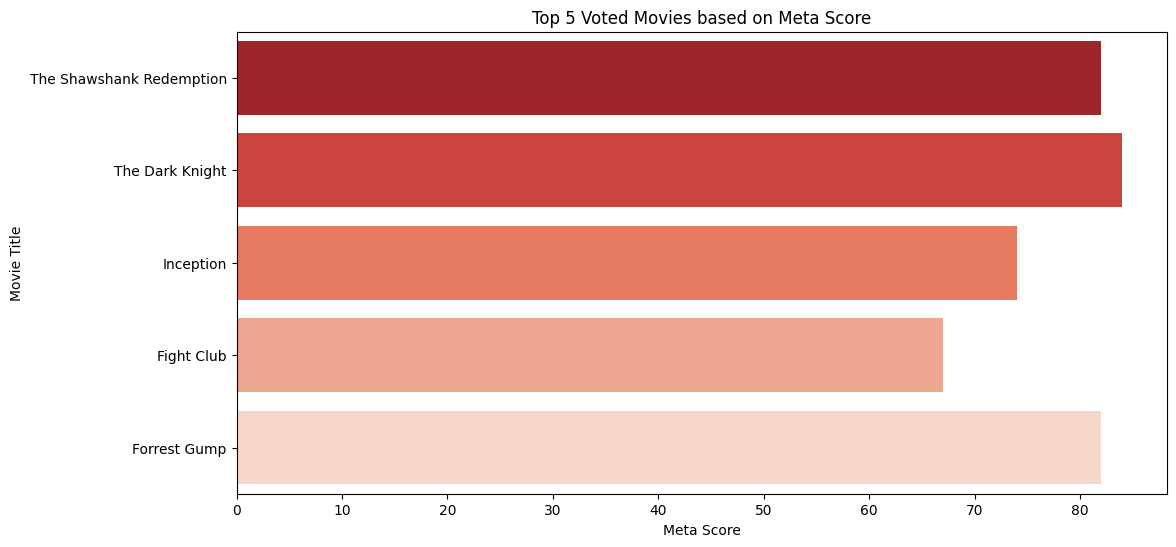

In [96]:
top_meta_movies = movies.sort_values(by='Metascore', ascending=False).head(5)

plt.figure(figsize=(12, 6))
sns.barplot(x='Metascore', y='Title', data=top_voted_movies, palette='Reds_r')
plt.title('Top 5 Voted Movies based on Meta Score')
plt.xlabel('Meta Score')
plt.ylabel('Movie Title')
plt.show()

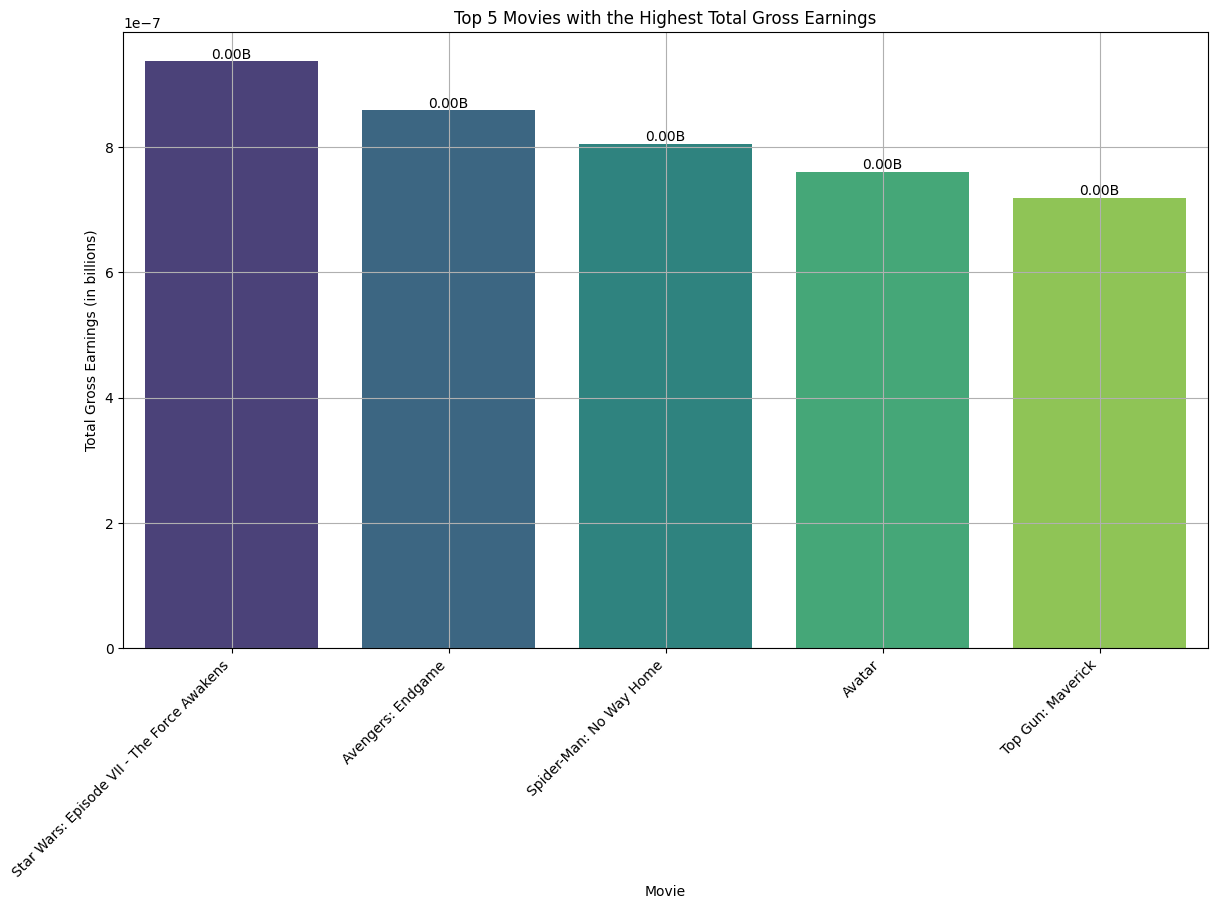

In [97]:
top_movies_gross = movies.groupby('Title')['Gross'].sum().nlargest(5)

plt.figure(figsize=(14, 8))
sns.barplot(x=top_movies_gross.index, y=top_movies_gross.values / 1e9, order=top_movies_gross.index, palette='viridis')
plt.title('Top 5 Movies with the Highest Total Gross Earnings')
plt.xlabel('Movie')
plt.ylabel('Total Gross Earnings (in billions)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
for index, value in enumerate(top_movies_gross.values):
    plt.text(index, value / 1e9, f'{value/1e9:.2f}B', ha='center', va='bottom')
plt.show()

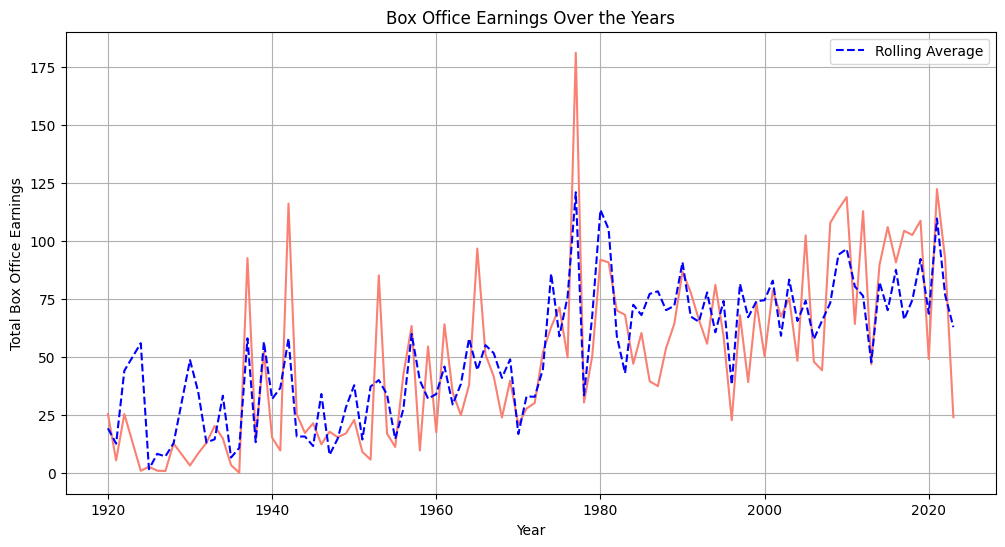

In [98]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Released_Year', y='Gross', data=movies, ci=None, color='salmon')
plt.title('Box Office Earnings Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Box Office Earnings')
plt.grid(True)
# Dodavanje rolling average za bolji uvid u trendove
movies['Gross_Rolling'] = movies['Gross'].rolling(window=5).mean()
sns.lineplot(x='Released_Year', y='Gross_Rolling', data=movies, ci=None, color='blue', linestyle='--', label='Rolling Average')
plt.legend()
plt.show()


In [99]:
def rating(IMDB_Rating):
    if IMDB_Rating >= 9.0:
        return 'Excellent'
    elif IMDB_Rating >= 8.0:
        return 'Very Good'
    elif IMDB_Rating >= 7.0:
        return 'Good'
    elif IMDB_Rating >= 6.0:
        return 'Average'
    else:
        return 'Poor'

movies['Rating_Category'] = movies['IMDB_Rating'].apply(rating)
movies.head(15)

,Title,Released_Year,Runtime,IMDB_Rating,Metascore,Gross,No_of_Votes,Movie Name Normalized,decade,Gross_Rolling,Rating_Category
0,The Shawshank Redemption,1994,142,9.3,82.0,28.34,2777378,the shawshank redemption,1990,NaN,Excellent
1,The Godfather,1972,175,9.2,100.0,134.97,1933588,the godfather,1970,NaN,Excellent
2,The Dark Knight,2008,152,9.0,84.0,534.86,2754087,the dark knight,2000,NaN,Excellent
3,Schindler's List,1993,195,9.0,95.0,96.90,1397886,schindlers list,1990,NaN,Excellent
4,12 Angry Men,1957,96,9.0,97.0,4.36,824211,12 angry men,1950,159.886,Excellent
5,The Lord of the Rings: The Return of the King,2003,201,9.0,94.0,377.85,1904166,the lord of the rings the return of the king,2000,229.788,Excellent
6,The Godfather Part II,1974,202,9.0,90.0,57.30,1314609,the godfather part ii,1970,214.254,Excellent
7,Spider-Man: Across the Spider-Verse,2023,140,8.9,86.0,15.00,198031,spider man across the spider verse,2020,110.282,Very Good
8,Pulp Fiction,1994,154,8.9,95.0,107.93,2131189,pulp fiction,1990,112.488,Very Good
9,Inception,2010,148,8.8,74.0,292.58,2444816,inception,2010,170.132,Very Good


In [100]:
rating_votes = movies[['IMDB_Rating', 'No_of_Votes']]

rating_votes

,IMDB_Rating,No_of_Votes
0,9.3,2777378
1,9.2,1933588
2,9.0,2754087
3,9.0,1397886
4,9.0,824211
...,...,...
995,7.6,102336
996,7.6,75004
997,7.6,55589
998,7.6,37822


In [101]:
rating_votes1 = rating_votes.groupby('IMDB_Rating')['No_of_Votes'].mean().reset_index()

rating_votes1

,IMDB_Rating,No_of_Votes
0,7.6,3.014678e+05
1,7.7,1.945388e+05
2,7.8,2.209207e+05
3,7.9,2.199422e+05
4,8.0,2.453096e+05
5,8.1,2.702410e+05
6,8.2,4.033978e+05
7,8.3,4.746166e+05
8,8.4,5.891396e+05
9,8.5,8.068400e+05


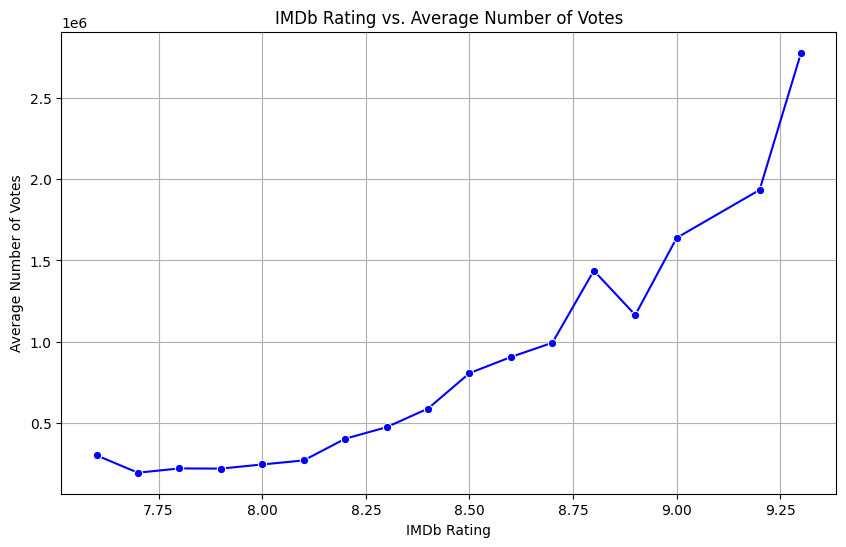

In [102]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='IMDB_Rating', y='No_of_Votes', data=rating_votes1, marker='o', color='b')
plt.title('IMDb Rating vs. Average Number of Votes')
plt.xlabel('IMDb Rating')
plt.ylabel('Average Number of Votes')
plt.grid(True)
plt.show()

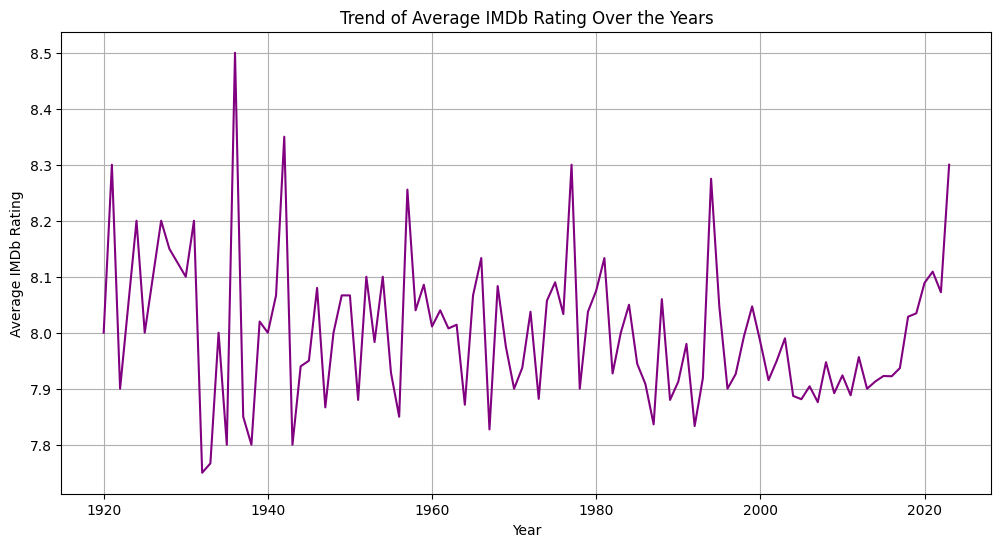

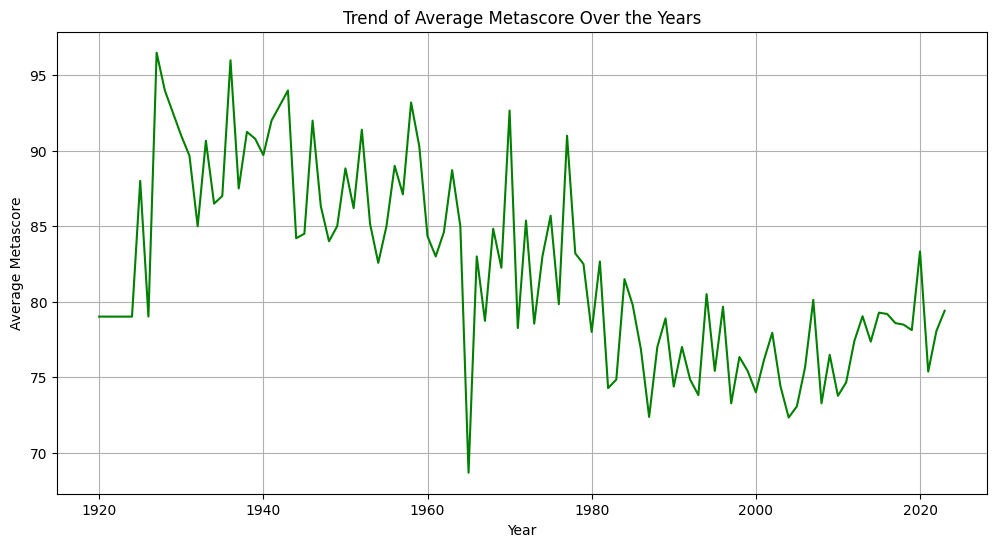

In [103]:
plt.figure(figsize=(12, 6))
avg_rating_per_year = movies.groupby('Released_Year')['IMDB_Rating'].mean()
sns.lineplot(x=avg_rating_per_year.index, y=avg_rating_per_year.values, color='purple')
plt.title('Trend of Average IMDb Rating Over the Years')
plt.xlabel('Year')
plt.ylabel('Average IMDb Rating')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
avg_metascore_per_year = movies.groupby('Released_Year')['Metascore'].mean()
sns.lineplot(x=avg_metascore_per_year.index, y=avg_metascore_per_year.values, color='green')
plt.title('Trend of Average Metascore Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Metascore')
plt.grid(True)
plt.show()